# 04. Baseline 모델 구축

**목표**: Linear Regression 기반 Baseline 모델 구축 및 평가

## 📋 작업 계획

1. 데이터 로드
2. Linear Regression 모델 학습
3. 모델 평가 (RMSE, MAE, R²)
4. 예측 결과 시각화
5. 모델 저장

## 1. 라이브러리 및 데이터 로드

In [59]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'  # Mac
plt.rcParams['axes.unicode_minus'] = False

# 프로젝트 루트 경로 추가
sys.path.append('..')

from utils.evaluation import evaluate_model, plot_actual_vs_predicted, plot_residuals

print("라이브러리 로드 완료!")

라이브러리 로드 완료!


In [60]:
# 데이터 로드
X_train = pd.read_csv('data/final/X_train.csv')
X_val = pd.read_csv('data/final/X_val.csv')
X_test = pd.read_csv('data/final/X_test.csv')

y_train = pd.read_csv('data/final/y_train.csv')['audiAcc']
y_val = pd.read_csv('data/final/y_val.csv')['audiAcc']
y_test = pd.read_csv('data/final/y_test.csv')['audiAcc']

print("데이터 로드 완료!")
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

데이터 로드 완료!
Train: (876, 46), Val: (188, 46), Test: (188, 46)


## 2. Baseline 모델: Linear Regression

In [61]:
# Linear Regression 모델 생성 및 학습
print("Linear Regression 모델 학습 중...")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("학습 완료!")

Linear Regression 모델 학습 중...
학습 완료!


## 3. 모델 평가

### 3.1 Train Set 평가

In [62]:
# Train 예측
y_train_pred = lr_model.predict(X_train)

# 평가
train_metrics = evaluate_model(y_train, y_train_pred, model_name='Linear Regression (Train)')


=== Linear Regression (Train) Performance ===
RMSE: 930,377 명
MAE: 494,691 명
R²: 0.611
MAPE: 3482.18%


### 3.2 Validation Set 평가

In [63]:
# Validation 예측
y_val_pred = lr_model.predict(X_val)

# 평가
val_metrics = evaluate_model(y_val, y_val_pred, model_name='Linear Regression (Validation)')


=== Linear Regression (Validation) Performance ===
RMSE: 1,294,433 명
MAE: 612,709 명
R²: 0.489
MAPE: 2202.31%


### 3.3 과적합 확인

In [64]:
print("\n=== 과적합 확인 ===")
print(f"Train R²: {train_metrics['R2']:.3f}")
print(f"Val R²:   {val_metrics['R2']:.3f}")
print(f"차이:     {abs(train_metrics['R2'] - val_metrics['R2']):.3f}")

if abs(train_metrics['R2'] - val_metrics['R2']) < 0.1:
    print("\n✅ 과적합 위험 낮음")
else:
    print("\n⚠️ 과적합 가능성 있음")


=== 과적합 확인 ===
Train R²: 0.611
Val R²:   0.489
차이:     0.122

⚠️ 과적합 가능성 있음


## 4. 예측 결과 시각화

### 4.1 실제값 vs 예측값

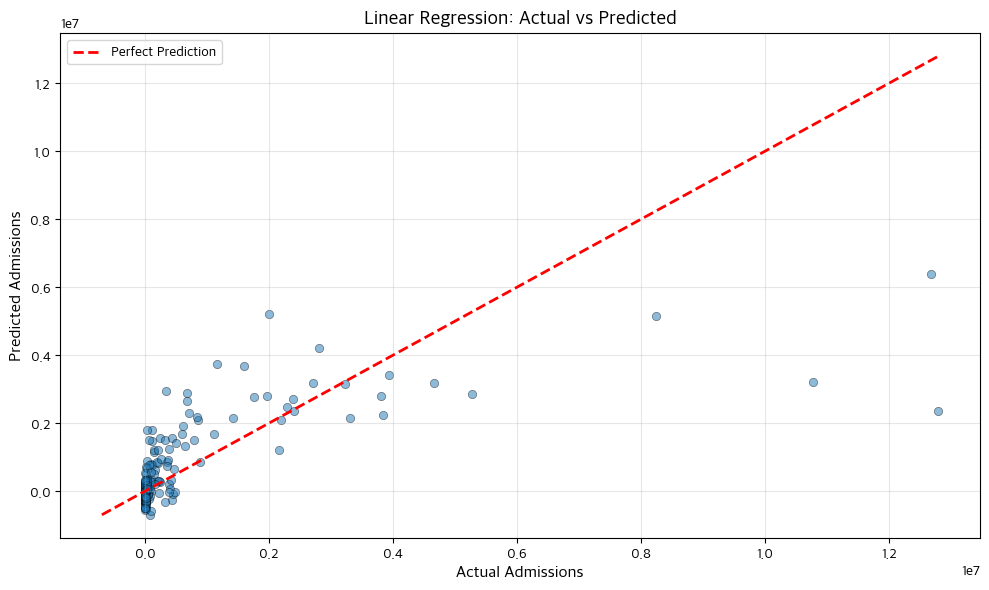

In [65]:
# Validation set 시각화
plot_actual_vs_predicted(y_val, y_val_pred, model_name='Linear Regression')

### 4.2 잔차(오차) 분석

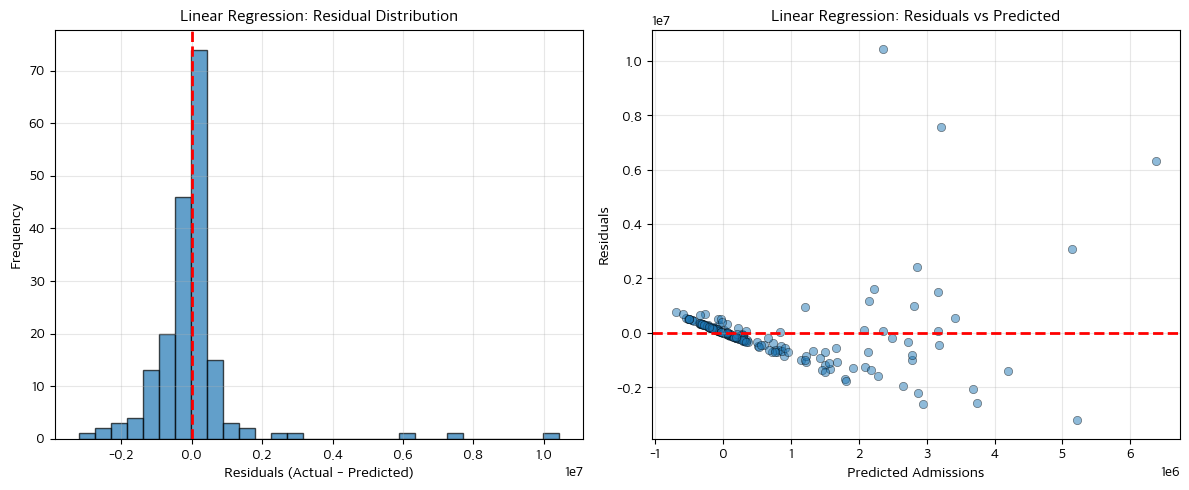

In [66]:
# 잔차 시각화
plot_residuals(y_val, y_val_pred, model_name='Linear Regression')

### 4.3 예측 오차 분포

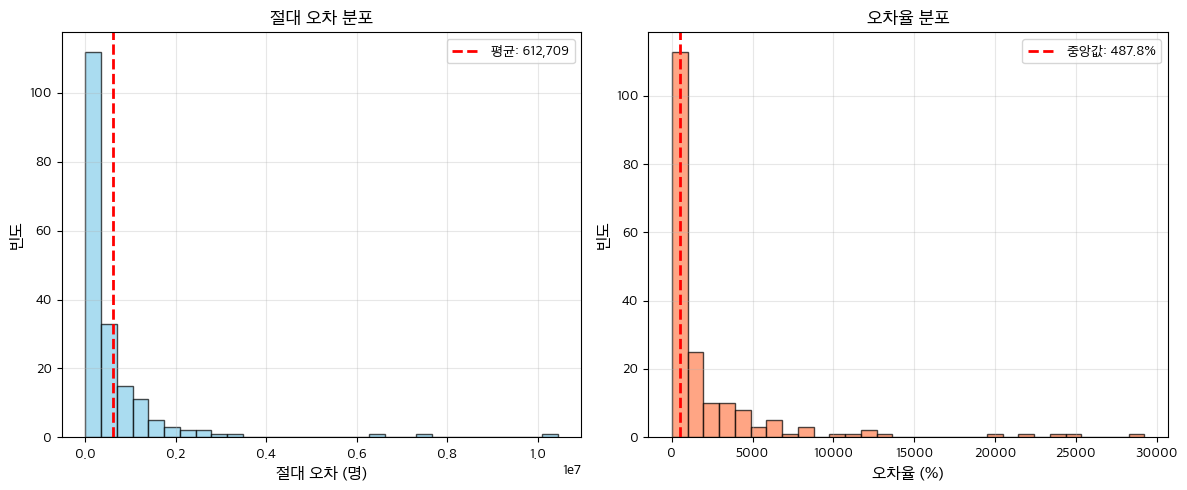

평균 절대 오차: 612,709 명
중앙값 오차율: 487.8%


In [67]:
# 오차율 계산
errors = np.abs(y_val - y_val_pred)
error_percentages = (errors / y_val) * 100

plt.figure(figsize=(12, 5))

# 절대 오차
plt.subplot(1, 2, 1)
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('절대 오차 (명)', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.title('절대 오차 분포', fontsize=13, fontweight='bold')
plt.axvline(errors.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {errors.mean():,.0f}')
plt.legend()
plt.grid(True, alpha=0.3)

# 오차율
plt.subplot(1, 2, 2)
plt.hist(error_percentages, bins=30, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('오차율 (%)', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.title('오차율 분포', fontsize=13, fontweight='bold')
plt.axvline(error_percentages.median(), color='red', linestyle='--', linewidth=2, 
            label=f'중앙값: {error_percentages.median():.1f}%')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"평균 절대 오차: {errors.mean():,.0f} 명")
print(f"중앙값 오차율: {error_percentages.median():.1f}%")

## 5. Feature 계수 분석

=== Top 15 중요 Feature (계수 절댓값 기준) ===
               feature   coefficient
6           avg_search -9.117969e+06
3       search_opening  7.208136e+06
2     search_1w_before  5.022746e+06
7    search_volatility -4.572362e+06
4      search_1w_after  1.732482e+06
1     search_2w_before  1.312081e+06
0     search_4w_before -1.294780e+06
5           max_search  5.498490e+05
8   search_growth_rate -4.294144e+05
44  distributor_target  3.418280e+05
9       director_power  2.255087e+05
40       season_spring  1.482384e+05
11        ticket_power  1.398494e+05
42  season_winter_peak -1.021629e+05
15            genre_SF  9.576271e+04


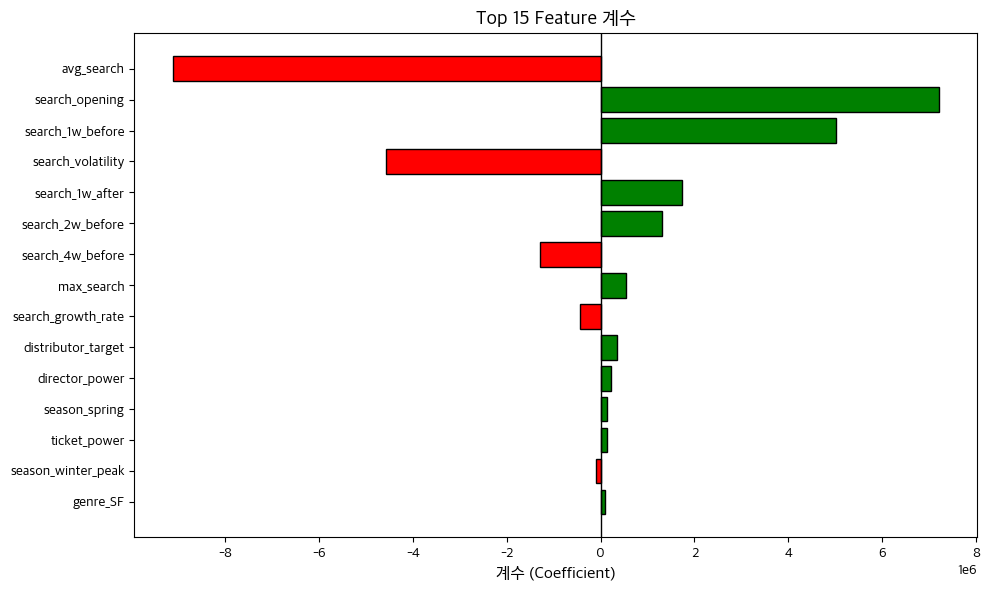

In [68]:
# Feature 계수 확인
feature_names = X_train.columns
coefficients = lr_model.coef_

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print("=== Top 15 중요 Feature (계수 절댓값 기준) ===")
print(coef_df.head(15)[['feature', 'coefficient']])

# 시각화
top_features = coef_df.head(15)

plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in top_features['coefficient']]
plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('계수 (Coefficient)', fontsize=12)
plt.title('Top 15 Feature 계수', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. 모델 저장

In [69]:
# 모델 저장
joblib.dump(lr_model, 'models/baseline_lr.pkl')

# 성능 메트릭 저장
results = {
    'model': 'Linear Regression',
    'train_rmse': train_metrics['RMSE'],
    'train_mae': train_metrics['MAE'],
    'train_r2': train_metrics['R2'],
    'val_rmse': val_metrics['RMSE'],
    'val_mae': val_metrics['MAE'],
    'val_r2': val_metrics['R2']
}

results_df = pd.DataFrame([results])
results_df.to_csv('results/tables/baseline_results.csv', index=False)

print("모델 및 결과 저장 완료!")
print("  - models/baseline_lr.pkl")
print("  - results/tables/baseline_results.csv")

모델 및 결과 저장 완료!
  - models/baseline_lr.pkl
  - results/tables/baseline_results.csv


## 7. Baseline 성능 요약

In [70]:
print("\n" + "="*60)
print("Baseline 모델 성능 요약")
print("="*60)

print("\n📊 모델: Linear Regression")

print("\n🎯 Validation Set 성능")
print(f"  - RMSE: {val_metrics['RMSE']:,.0f} 명")
print(f"  - MAE:  {val_metrics['MAE']:,.0f} 명")
print(f"  - R²:   {val_metrics['R2']:.3f}")
print(f"  - MAPE: {val_metrics['MAPE']:.2f}%")

print("\n📈 해석")
if val_metrics['R2'] > 0.7:
    print("  ✅ 우수한 성능 (R² > 0.7)")
elif val_metrics['R2'] > 0.5:
    print("  ✅ 양호한 성능 (R² > 0.5)")
elif val_metrics['R2'] > 0.3:
    print("  ⚠️ 개선 필요 (R² > 0.3)")
else:
    print("  ❌ 낮은 성능 (R² < 0.3) - Feature Engineering 재검토 필요")

print("\n" + "="*60)
print("✅ Baseline 모델 구축 완료!")
print("다음 단계: 05_advanced_models.ipynb")
print("="*60)


Baseline 모델 성능 요약

📊 모델: Linear Regression

🎯 Validation Set 성능
  - RMSE: 1,294,433 명
  - MAE:  612,709 명
  - R²:   0.489
  - MAPE: 2202.31%

📈 해석
  ⚠️ 개선 필요 (R² > 0.3)

✅ Baseline 모델 구축 완료!
다음 단계: 05_advanced_models.ipynb
